Training Model

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('ramen_rating_2023_final.csv')
df

,Stars,T,IsSpicy,HasChicken,HasBeef,HasSeafoods,With_Cup,With_Other,With_Pack,With_Tray,...,In_Indonesia,In_Japan,In_Malaysia,In_Other,In_Singapore,In_South Korea,In_Taiwan,In_Thailand,In_United States,In_Vietnam
0,5.0,NaN,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,NaN,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,4.5,NaN,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,4.5,NaN,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,5.0,NaN,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4627,3.5,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4628,1.0,NaN,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4629,2.0,NaN,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4630,2.0,NaN,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
df['Stars'].value_counts()

Stars
5.000      938
3.500      677
3.750      643
4.000      541
4.500      315
3.250      250
4.250      240
3.000      208
2.750      124
2.000      124
2.500      117
4.750      113
1.500       64
0.000       61
1.000       53
1.750       35
2.250       33
0.500       26
0.250       24
1.250       18
0.750        3
1.100        2
3.100        2
4.125        2
2.900        2
2.800        2
3.700        1
3.650        1
3.200        1
2.300        1
2.850        1
3.600        1
3.400        1
2.125        1
0.100        1
35.000       1
3.125        1
0.900        1
2.100        1
435.000      1
1.800        1
Name: count, dtype: int64

(array([4.631e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  43.5,  87. , 130.5, 174. , 217.5, 261. , 304.5, 348. ,
        391.5, 435. ]),
 <BarContainer object of 10 artists>)

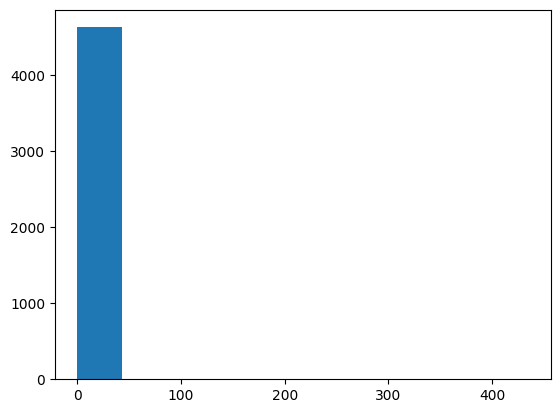

In [14]:
plt.hist(df['Stars'])

In [15]:
df['Stars'].median()

3.75

In [16]:
df['binStars'] = df['Stars'].apply(lambda x: 1 if x > 3.75 else 0)
df

,Stars,T,IsSpicy,HasChicken,HasBeef,HasSeafoods,With_Cup,With_Other,With_Pack,With_Tray,...,In_Japan,In_Malaysia,In_Other,In_Singapore,In_South Korea,In_Taiwan,In_Thailand,In_United States,In_Vietnam,binStars
0,5.0,NaN,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,5.0,NaN,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,4.5,NaN,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,4.5,NaN,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,5.0,NaN,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4627,3.5,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4628,1.0,NaN,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4629,2.0,NaN,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4630,2.0,NaN,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
df['binStars'].value_counts()

binStars
0    2481
1    2151
Name: count, dtype: int64

In [18]:
x = df.drop(['binStars', 'Stars','T'], axis=1)
y = df['binStars']

In [19]:
#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

LogisticRegression

In [20]:
#LogisticRegression
logr = LogisticRegression()
logr.fit(x_train, y_train)
logr_pred = logr.predict(x_test)

In [21]:
confusion_matrix(y_test, logr_pred)

array([[325, 172],
       [178, 252]], dtype=int64)

In [22]:
print(classification_report(y_test, logr_pred))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       497
           1       0.59      0.59      0.59       430

    accuracy                           0.62       927
   macro avg       0.62      0.62      0.62       927
weighted avg       0.62      0.62      0.62       927



DecisionTreeClassifier

In [23]:
#decisiontreeclassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)

In [24]:
confusion_matrix(y_test, tree_pred)

array([[318, 179],
       [185, 245]], dtype=int64)

In [25]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.63      0.64      0.64       497
           1       0.58      0.57      0.57       430

    accuracy                           0.61       927
   macro avg       0.61      0.60      0.60       927
weighted avg       0.61      0.61      0.61       927



RandomForestClassifier

In [26]:
#RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
forest_pred = forest.predict(x_test)

In [27]:
confusion_matrix(y_test, forest_pred)

array([[298, 199],
       [160, 270]], dtype=int64)

In [28]:
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

           0       0.65      0.60      0.62       497
           1       0.58      0.63      0.60       430

    accuracy                           0.61       927
   macro avg       0.61      0.61      0.61       927
weighted avg       0.62      0.61      0.61       927



Kiểm tra các hệ số thể hiện mức độ ảnh hưởng của mỗi đặc trưng đến dự đoán của mô hình

In [29]:
logr_feature = pd.DataFrame({"feature": x.columns,
                             "importance": logr.coef_[0]})
logr_feature.sort_values('importance', ascending=False)

,feature,importance
20,from_MyKuali,1.686607
5,With_Other,1.285775
39,In_Indonesia,1.062340
45,In_Taiwan,0.754099
27,from_Samyang Foods,0.743988
14,from_MAMA,0.722878
23,from_Nongshim,0.708690
43,In_Singapore,0.663928
40,In_Japan,0.607001
41,In_Malaysia,0.556315


In [30]:
tree_feature = pd.DataFrame({"feature": x.columns,
                             "importance": tree.feature_importances_})
tree_feature.sort_values('importance', ascending=False)

,feature,importance
42,In_Other,0.107140
3,HasSeafoods,0.059005
1,HasChicken,0.056976
6,With_Pack,0.056613
24,from_Other,0.055052
0,IsSpicy,0.053205
2,HasBeef,0.050389
48,In_Vietnam,0.048071
22,from_Nissin,0.045494
46,In_Thailand,0.041813


In [31]:
forest_feature = pd.DataFrame({"feature": x.columns,
                             "importance": forest.feature_importances_})
forest_feature.sort_values('importance', ascending=False)

,feature,importance
0,IsSpicy,0.086900
42,In_Other,0.076488
1,HasChicken,0.060881
3,HasSeafoods,0.060256
6,With_Pack,0.058835
4,With_Cup,0.049917
2,HasBeef,0.045742
24,from_Other,0.042849
47,In_United States,0.035622
48,In_Vietnam,0.031778


In [32]:
import pickle

In [33]:
pickle.dump(logr, open('LogR_Model.pkl','wb'))
pickle.dump(tree, open('Tree_Model.pkl','wb'))
pickle.dump(forest, open('Forest_Model.pkl','wb'))